# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from citipy import citipy
import numpy as np
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Number of Cities to generate
no_cities = 550

# Create empty lists for storing cities and country codes
cities = []
country_codes = []

for x in range(no_cities):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Generate more geo lat and Long values for new cities 
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Append data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
    #Store country codes in Uppercase 
    country_codes = [x.upper() for x in country_codes]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists for storing temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
        cloudiness.append(np.nan)
    
    
    # Print each city name in a specific   
    print(f"Processing record {x + 1} of Set 1 | {cities[x]}") 
    
print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")        

Processing record 1 of Set 1 | rawannawi
Processing record 2 of Set 1 | byron bay
Processing record 3 of Set 1 | taolanaro
Processing record 4 of Set 1 | puerto ayora
Processing record 5 of Set 1 | bambous virieux
Processing record 6 of Set 1 | san cristobal
Processing record 7 of Set 1 | mehamn
Processing record 8 of Set 1 | tiksi
Processing record 9 of Set 1 | belushya guba
Processing record 10 of Set 1 | castro
Processing record 11 of Set 1 | tulum
Processing record 12 of Set 1 | raudeberg
Processing record 13 of Set 1 | bethel
Processing record 14 of Set 1 | ushuaia
Processing record 15 of Set 1 | longyearbyen
Processing record 16 of Set 1 | waipawa
Processing record 17 of Set 1 | beringovskiy
Processing record 18 of Set 1 | havoysund
Processing record 19 of Set 1 | busselton
Processing record 20 of Set 1 | cherskiy
Processing record 21 of Set 1 | jawhar
Processing record 22 of Set 1 | kununurra
Processing record 23 of Set 1 | rikitea
Processing record 24 of Set 1 | mataura
Process

Processing record 197 of Set 1 | lecce
Processing record 198 of Set 1 | qui nhon
Processing record 199 of Set 1 | new baltimore
Processing record 200 of Set 1 | chokurdakh
Processing record 201 of Set 1 | pangnirtung
Processing record 202 of Set 1 | quatre cocos
Processing record 203 of Set 1 | sharjah
Processing record 204 of Set 1 | jalingo
Processing record 205 of Set 1 | beamsville
Processing record 206 of Set 1 | sitka
Processing record 207 of Set 1 | panjab
Processing record 208 of Set 1 | port hedland
Processing record 209 of Set 1 | shorapur
Processing record 210 of Set 1 | mahibadhoo
Processing record 211 of Set 1 | abu samrah
Processing record 212 of Set 1 | isangel
Processing record 213 of Set 1 | tuatapere
Processing record 214 of Set 1 | kribi
Processing record 215 of Set 1 | broome
Processing record 216 of Set 1 | saint-augustin
Processing record 217 of Set 1 | arraial do cabo
Processing record 218 of Set 1 | moose factory
Processing record 219 of Set 1 | talara
Processin

Processing record 391 of Set 1 | belyy yar
Processing record 392 of Set 1 | araouane
Processing record 393 of Set 1 | bama
Processing record 394 of Set 1 | sentyabrskiy
Processing record 395 of Set 1 | colares
Processing record 396 of Set 1 | saldanha
Processing record 397 of Set 1 | male
Processing record 398 of Set 1 | honiara
Processing record 399 of Set 1 | talcahuano
Processing record 400 of Set 1 | faanui
Processing record 401 of Set 1 | gudur
Processing record 402 of Set 1 | batsfjord
Processing record 403 of Set 1 | burnie
Processing record 404 of Set 1 | kousseri
Processing record 405 of Set 1 | zhanaozen
Processing record 406 of Set 1 | bolshoye sorokino
Processing record 407 of Set 1 | rehoboth
Processing record 408 of Set 1 | sinnamary
Processing record 409 of Set 1 | grand centre
Processing record 410 of Set 1 | gobabis
Processing record 411 of Set 1 | tekirdag
Processing record 412 of Set 1 | muravlenko
Processing record 413 of Set 1 | huilong
Processing record 414 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Generate and Display the DataFrame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Max Temp": temperature,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country_codes,
                           "Date": dates
                             })

In [5]:
# Export the city data into a .csv
weather_df.to_csv("Weather_Data.csv")

In [6]:
#Generate Descriptive Stats
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02
mean,19.153962,19.019998,62.673414,67.236364,55.848485,7.966384,1.619619e+09
std,34.424845,93.249530,22.385514,23.342258,37.602859,4.901914,1.169188e+02
min,-54.800000,-175.200000,2.160000,1.000000,0.000000,0.180000,1.619619e+09
25%,-8.959450,-60.215050,46.990000,54.500000,20.000000,4.450000,1.619619e+09
50%,20.894700,23.371600,66.870000,72.000000,73.000000,6.910000,1.619619e+09
75%,50.158400,100.019650,78.900000,85.500000,92.000000,10.830000,1.619619e+09
max,78.218600,179.316700,110.750000,100.000000,100.000000,27.630000,1.619619e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

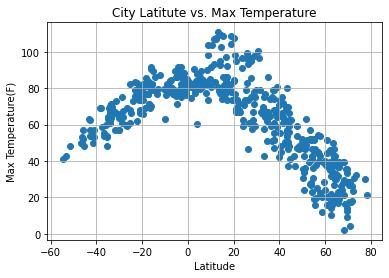

In [7]:
# Generate a scatter plot of Latitude vs. Temperature Plot

x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitute vs. Max Temperature')
plt.savefig('Lat_Temp_plot.png')
plt.show()

## Latitude vs. Humidity Plot

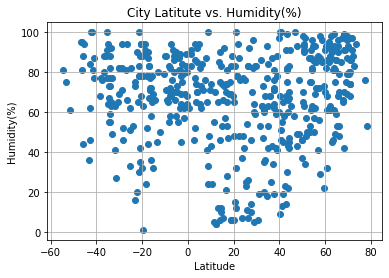

In [8]:
# Generate a scatter plot of Latitude vs. HUmidity(%)

x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitute vs. Humidity(%)')
plt.savefig('Lat_Humidity_plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

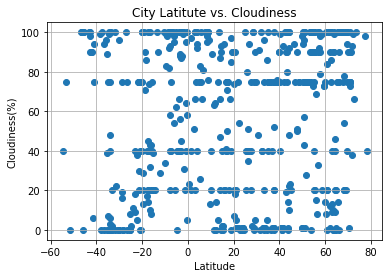

In [9]:
# Generate a scatter plot of Latitude vs. Cloudiness Plot

x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitute vs. Cloudiness')
plt.savefig('Lat_Cloudiness_plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

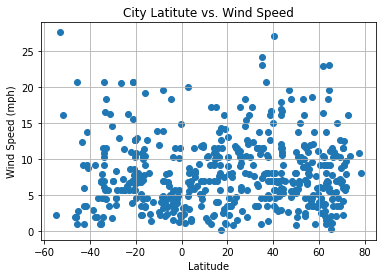

In [10]:
# Generate a scatter plot of Latitude vs. Wind Speed Plot

x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitute vs. Wind Speed')
plt.savefig('Lat_Windspeed_plot.png')
plt.show()

## Linear Regression

In [11]:
# Northern Hemisphere Dataframe
nh_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]

# Southern Hemisphere Dataframe

sh_weather_df = weather_df.loc[weather_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


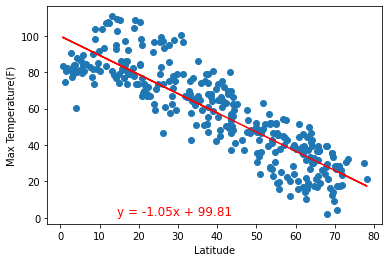

In [12]:
x_values = nh_weather_df['Latitude']
y_values = nh_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.18),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a strong negitive correlation between Max Temp and Latitude in the Northern Hemisphere. As the latitudes go 
# higher, the max temp comes down by the Linear Regression Equation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.83


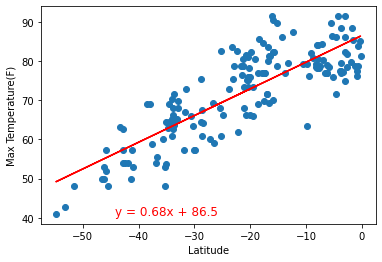

In [13]:
x_values = sh_weather_df['Latitude']
y_values = sh_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.18),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a strong positive correlation between Max Temp and Latitude in the Southern Hemisphere. As the latitudes go 
# higher, the max temp goes up by the Linear Regression Equation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29


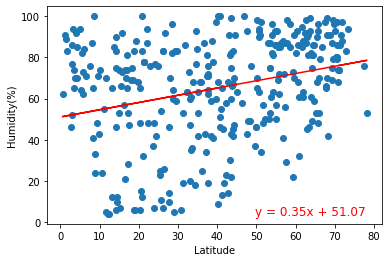

In [14]:
x_values = nh_weather_df['Latitude']
y_values = nh_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.65,0.18),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a small positive correlation between Humidity (%) and Latitude in the Northern Hemisphere. As the latitudes go 
# higher, the Humidity (%) goes up by the Linear Regression Equation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03


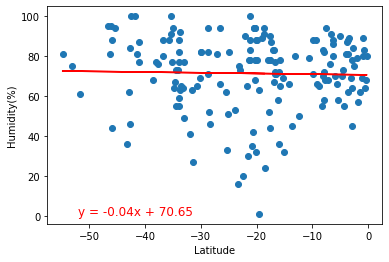

In [15]:
x_values = sh_weather_df['Latitude']
y_values = sh_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.2,0.18),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a small negitive correlation between Humidity (%) and Latitude in the Southern Hemisphere. As the latitudes go 
# higher, the Humidity (%) goes down by the Linear Regression Equation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13


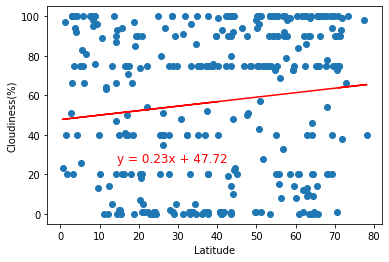

In [16]:
x_values = nh_weather_df['Latitude']
y_values = nh_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.38),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a small positive correlation between Cloudiness (%)  and Latitude in the Northern Hemisphere. As the latitudes go 
# higher, the Cloudiness (%) goes up by the Linear Regression Equation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12


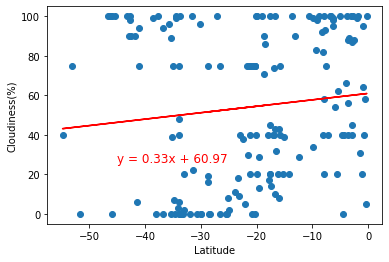

In [17]:
x_values = sh_weather_df['Latitude']
y_values = sh_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.38),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()

# Analysis :
# There is a small positive correlation between Cloudiness (%)  and Latitude in the Southern Hemisphere. As the latitudes go 
# higher, the Cloudiness (%) goes up by the Linear Regression Equation. The correlation is similar in the Northern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04


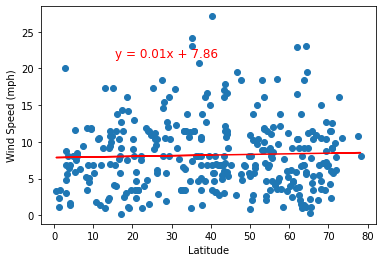

In [18]:
x_values = nh_weather_df['Latitude']
y_values = nh_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.78),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()


# Analysis :
# There is a small positive correlation between Wind Speed (mph)  and Latitude in the Northern Hemisphere. As the latitudes go 
# higher, the Wind Speed (mph) goes up by the Linear Regression Equation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12


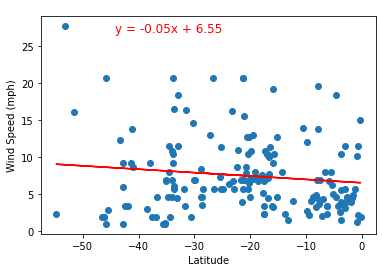

In [19]:
x_values = sh_weather_df['Latitude']
y_values = sh_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.88),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {round(correlation[0],2)}")
plt.show()


# Analysis :
# There is a very small positive to no correlation between Wind Speed (mph) and Latitude in the Southern Hemisphere. As the latitudes go 
# higher, the Wind Speed (mph) goes up by the Linear Regression Equation.